In [1]:
import pandas as pd




medical_df = pd.read_csv(r"C:\Users\ASUS\Downloads\Medical.csv")




print(medical_df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [2]:
avg_charges_by_smoker = medical_df.groupby('smoker')['charges'].mean()
print("Average Charges by Smoker Status :")
print(avg_charges_by_smoker)

Average Charges by Smoker Status :
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


In [3]:
medical_df['smoker'] = medical_df['smoker'].map({'yes' : 1,'no' : 0})




correlation = medical_df[['age', 'bmi', 'smoker', 'charges']].corr()
print("Correlation Matrix :")
print(correlation)

Correlation Matrix :
              age       bmi    smoker   charges
age      1.000000  0.109272 -0.025019  0.299008
bmi      0.109272  1.000000  0.003750  0.198341
smoker  -0.025019  0.003750  1.000000  0.787251
charges  0.299008  0.198341  0.787251  1.000000


In [4]:
Q1 = medical_df['charges'].quantile(0.25)
Q3 = medical_df['charges'].quantile(0.75)
IQR = Q3 - Q1
outliers = medical_df[(medical_df['charges'] < (Q1 - 1.5 * IQR)) | (medical_df['charges'] > (Q3 + 1.5 * IQR))]
print("Outliers in Charges :")
print(outliers)

Outliers in Charges :
      age     sex     bmi  children  smoker     region      charges
14     27    male  42.130         0       1  southeast  39611.75770
19     30    male  35.300         0       1  southwest  36837.46700
23     34  female  31.920         1       1  northeast  37701.87680
29     31    male  36.300         2       1  southwest  38711.00000
30     22    male  35.600         0       1  southwest  35585.57600
...   ...     ...     ...       ...     ...        ...          ...
1300   45    male  30.360         0       1  southeast  62592.87309
1301   62    male  30.875         3       1  northwest  46718.16325
1303   43    male  27.800         0       1  southwest  37829.72420
1313   19  female  34.700         2       1  southwest  36397.57600
1323   42  female  40.370         2       1  southeast  43896.37630

[139 rows x 7 columns]


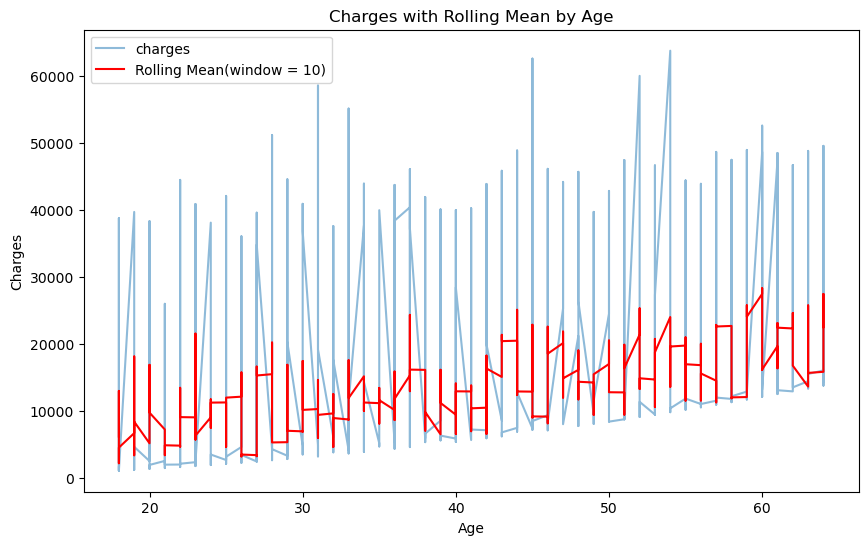

In [5]:
import matplotlib.pyplot as plt




medical_df = medical_df.sort_values('age')




medical_df['rolling_mean'] = medical_df['charges'].rolling(window = 10).mean()




plt.figure(figsize = (10, 6))
plt.plot(medical_df['age'], medical_df['charges'], label = 'charges', alpha = 0.5)
plt.plot(medical_df['age'], medical_df['rolling_mean'], label = 'Rolling Mean(window = 10)', color = 'red')
plt.title('Charges with Rolling Mean by Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

In [6]:
percentiles = medical_df['charges'].quantile([0.25, 0.5, 0.75, 0.9])
print("Percentiles for Charges :")
print(percentiles)

Percentiles for Charges :
0.25     4740.287150
0.50     9382.033000
0.75    16639.912515
0.90    34831.719700
Name: charges, dtype: float64
